<a href="https://colab.research.google.com/github/faith4hub/Exploratory_Data_Analysis/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE ATTRITION**
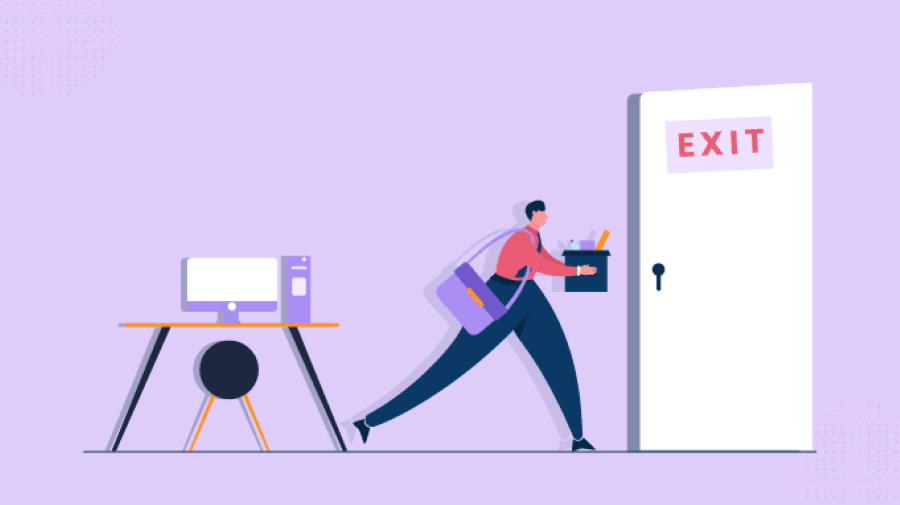

**Employee attrition is the gradual reduction in employee numbers. This occur when the size of your workforce diminishes over time and the causes could be voluntary resignations, illness, lay offs, failure to return from a leave or even death.**

**The effect of employee attrition impacts the company in so many ways such as; the costs to recruit and train new employees, more workload for other employees which could incure overtime costs, affect their productivity and might even lead them to attrition. This is the reason why most companies try to reduce employee atrrition by being staff-centric.**

**Here are few business questions we will be brainstorming using the dataset,**

• [What do you think are the 3 factors behind employee attrition?](#scrollTo=-2nA1jUCbhyk)

• [What is the relationship between Education and Monthly Income?](#scrollTo=shoQkojBdUXh&line=1&uniqifier=1)

• [What is the effect of age on attrition?](#scrollTo=DbdEiD4EeJOD)

• [Is Income the main factor in employee attrition?](#scrollTo=6pPI-WtZiHoC)

• [How does work-life balance impact the overall attrition rate?](#scrollTo=WcDQrXREjmXJ&line=1&uniqifier=1)




## **TABLE OF CONTENT**

<b>1. **PREPARATION**</b>
<ul>
 <b>1.1 Import Libraries</b>

 <b>1.2 Data Loading</b>

 <b>1.3 Data Cleaning & Preprocessing</b>
 </ul>

<b>2. **EXPLORATORY DATA ANALYSIS**</b>

 <ul>
 <b>2.1. Attrition Percentage</b>

 <b>2.2. Attrition based on Gender</b>

 <b>2.3. Attrition based on Department</b>

 <b>2.4.  Attrition based on Business Travle</b>

 <b>2.5. Attrition based on Monthly Rate</b>

 <b>2.6. Attrition based on Commute</b>

 <b>2.7. Attrition based on Satisfaction and Job Involvement</b>

 <b>2.8. Attrition based on Training, Promotion and Years of Service</b>

 <b>2.9. Attrition based on Monthly Income</b>

 <b>2.10. Attrition based on % Salary Hike</b>

 <b>2.11. Attrition based on Total working year</b>

 <b>2.12. Attrition based on Job level</b>

 <b>2.13. Attrition based on Age</b>

 <b>2.14. Heat Map of the dataset</b>

 <b>2.15. Barplot on Education and Monthly Income</b>

 <b>2.16. Scatterplot of Age against Monthly Income</b>
 </ul>

<b>3. **CONCLUSION**</b>

<b>4. **REFERENCES**</b>



###**1.1. Import Libraries**

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Built-in library
import itertools
import re
import typing as tp
import sqlite3
%load_ext sql
from typing import List, Union, Dict, Tuple

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

def binning(row, groups):
    for i in range(len(groups)-1):
        if((row>=groups[i])&(row<groups[i+1])):
            return "{}-{}".format(groups[i], groups[i+1])
    return "{}+".format(groups[-1])



###**1.2. Data Loading**

In [3]:
filepath = "attr_data.db" #path to save our database
# connect to a database
conn = sqlite3.connect(filepath)
# check if the database is connected successfully
print("Connected successfully")
# create cursor object that alllows the execution of SQL statements
cursor = conn.cursor()
#check if the cursor is created
print("cursor created")

Connected successfully
cursor created


In [4]:
#inspecting the table(s) in the database
sql_query = """
        SELECT name FROM sqlite_master
"""

result = cursor.execute(sql_query)

result.fetchall()

[('attrition_records',), ('sqlite_sequence',)]

In [5]:
#inspecting each table
sql_query = """
        SELECT * FROM sqlite_sequence
"""

result = cursor.execute(sql_query)

result.fetchall()

[('attrition_records', 1470)]

In [6]:
#inspecting each table
sql_query = """
        SELECT * FROM attrition_records
"""

result = cursor.execute(sql_query)
#to retrive a limited number of rows in the table
result.fetchmany(size=1)

[(1,
  41,
  'Yes',
  'Travel_Rarely',
  1102,
  'Sales',
  1,
  2,
  'Life Sciences',
  1,
  1,
  2,
  'Female',
  94,
  3,
  2,
  'Sales Executive',
  4,
  'Single',
  5993,
  19479,
  8,
  'Y',
  'Yes',
  11,
  3,
  1,
  80,
  0,
  8,
  0,
  1,
  6,
  4,
  0,
  5)]

There is only one table with many rows in the database thus we will be loading the table using pandas.

In [7]:
#using pandas to place the result of the query in the dataframe
df= pd.read_sql_query("SELECT * FROM 'attrition_records';", conn)
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


###**1.3. Data Cleaning & Preprocessing**

In [8]:
#the number of rows and columns of the table
df.shape

(1470, 36)

In [9]:
#to find the total entries in each column and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [10]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#to verify missing value(s) in each columns of the table
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [12]:
# inspecting the dataset to find out the number of unique values in each column
for column in df.columns:
    print(f"{column}: Number of unique values: {df[column].nunique()}")
    print("-------------------------------------------")

id: Number of unique values: 1470
-------------------------------------------
Age: Number of unique values: 43
-------------------------------------------
Attrition: Number of unique values: 2
-------------------------------------------
BusinessTravel: Number of unique values: 3
-------------------------------------------
DailyRate: Number of unique values: 886
-------------------------------------------
Department: Number of unique values: 3
-------------------------------------------
DistanceFromHome: Number of unique values: 29
-------------------------------------------
Education: Number of unique values: 5
-------------------------------------------
EducationField: Number of unique values: 6
-------------------------------------------
EmployeeCount: Number of unique values: 1
-------------------------------------------
EmployeeNumber: Number of unique values: 1470
-------------------------------------------
EnvironmentSatisfaction: Number of unique values: 4
----------------------

The following columns EmployeeCount, Over18 and StandardHours have only 1 unique values. Also, EmployeeNumber column have 1470 values. We will be dropping these columns.

In [13]:
#dropping columns with two many unique and one unique value
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df.shape #inspecting to make sure these columns are dropped

(1470, 32)

In [14]:
#converting some columns (that are int6) into object for better df analysis
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(2,'Medium')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(3,'High')
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace(4,'Very High')
df['Education']=df['Education'].replace(1,'Below College')
df['Education']=df['Education'].replace(2,'College')
df['Education']=df['Education'].replace(3,'Bachelor')
df['Education']=df['Education'].replace(4,'Master')
df['Education']=df['Education'].replace(5,'Doctor')
df['JobInvolvement']=df['JobInvolvement'].replace(1,'Low')
df['JobInvolvement']=df['JobInvolvement'].replace(2,'Medium')
df['JobInvolvement']=df['JobInvolvement'].replace(3,'High')
df['JobInvolvement']=df['JobInvolvement'].replace(4,'Very High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(1,'Low')
df['JobSatisfaction']=df['JobSatisfaction'].replace(2,'Medium')
df['JobSatisfaction']=df['JobSatisfaction'].replace(3,'High')
df['JobSatisfaction']=df['JobSatisfaction'].replace(4,'Very High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(1,'Low')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(2,'Medium')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(3,'High')
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace(4,'Very High')
df['PerformanceRating']=df['PerformanceRating'].replace(1,'Low')
df['PerformanceRating']=df['PerformanceRating'].replace(2,'Good')
df['PerformanceRating']=df['PerformanceRating'].replace(3,'Excellent')
df['PerformanceRating']=df['PerformanceRating'].replace(4,'Outstanding')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(1,'Bad')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(2,'Good')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(3,'Better')
df['WorkLifeBalance']=df['WorkLifeBalance'].replace(4,'Best')
df.head(2) # to be sure these changes are implemented 

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7


###**2.1. Attrition Percentage**

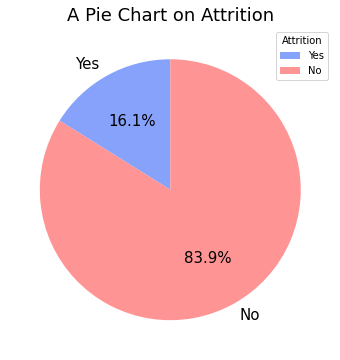

In [15]:
dq= df[["Attrition", "id"]]
hello=dq.groupby('Attrition').count()
hello.rename(columns = {'id': 'Count'},inplace = True)
hello_1=hello.reset_index()
yes=hello.Count.sort_values().index
Attrition= hello.Count.sort_values()
plt.figure(figsize=(8, 6))
plt.pie(Attrition, labels=yes, colors=['#87A2FB','#FF9494'], autopct='%1.1f%%', textprops={'fontsize':15}, startangle=90)
plt.title(f"A Pie Chart on Attrition", size = 18)
plt.legend(title='Attrition');

In this dataset, we can see that 83.9% of the employees  have not left the company.

###**2.2. Attrition based on Gender**

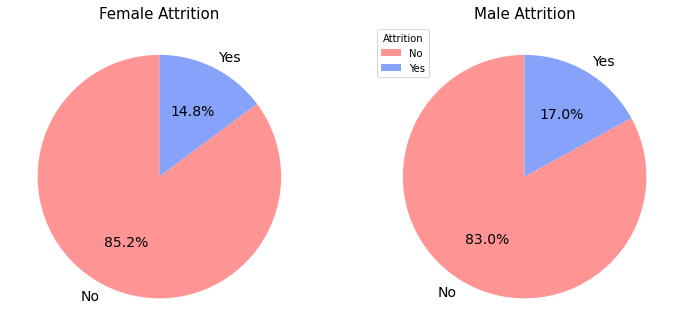

In [16]:
at=df.groupby(['Gender','Attrition'],as_index=False)['id'].count()
at['Count']=at['id']
at.drop('id',axis=1,inplace=True)
plt.rcParams['figure.figsize']=(12,7)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pie(at[(at['Gender']=='Female')]['Count'],labels=at[(at['Gender']=='Female')]['Attrition'],colors =['#FF9494','#87A2FB'], autopct='%1.1f%%', startangle=90, textprops={'fontsize':14} )
ax[0].set_title('Female Attrition', fontsize=15)
ax[1].pie(at[(at['Gender']=='Male')]['Count'],labels=at[(at['Gender']=='Male')]['Attrition'],colors =['#FF9494','#87A2FB'], autopct='%1.1f%%', startangle=90,textprops={'fontsize':14} )
ax[1].set_title('Male Attrition', fontsize=15)
plt.legend(title='Attrition');

In [17]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In this dataset, percentage of male attrition is higher than of the female, however there are more male employees to female employees.

###**2.3. Attrition based on Department**

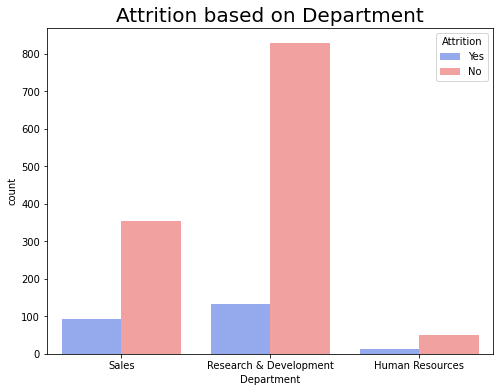

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=df, palette=['#87A2FB','#FF9494']).set_title('Attrition based on Department', fontdict={'fontsize': 20});

Research and Development have the highest amount of attrition by department and this is because its has the largest number of employees. However, if we are jugding based on percentage, the Human Resources department have the highest percent attrition, 23.1%.

###**2.4.  Attrition based on Business Travel**

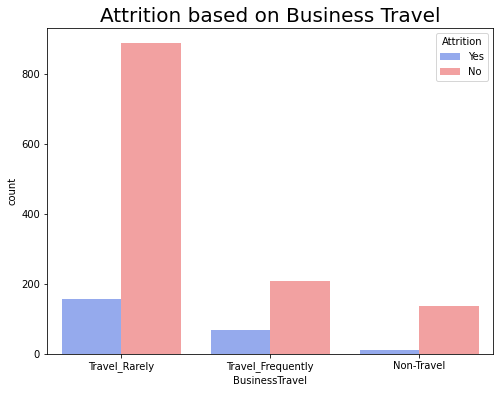

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=['#87A2FB','#FF9494']).set_title('Attrition based on Business Travel', fontdict={'fontsize': 20});

Based on the plot above, we can see sending employees for business travel has minimal impact in determining employee attrition.

###**2.5. Attrition based on Monthly Rate**

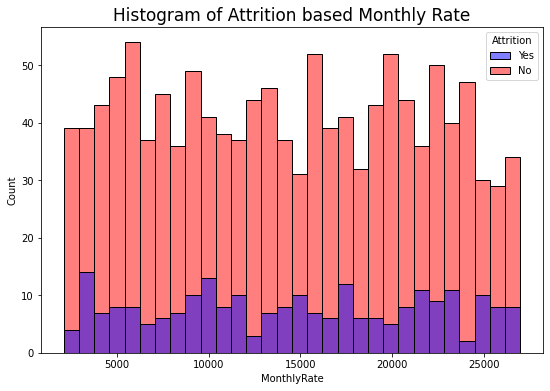

In [20]:
var = "MonthlyRate"
plt.figure(figsize=(9, 6))
colors=['b', 'r']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.histplot(df, x= var, hue ="Attrition", bins=30, palette=customPalette)
plt.title(f"Histogram of Attrition based Monthly Rate", size=17)
plt.show()

###**2.6. Attrition based on Commute**

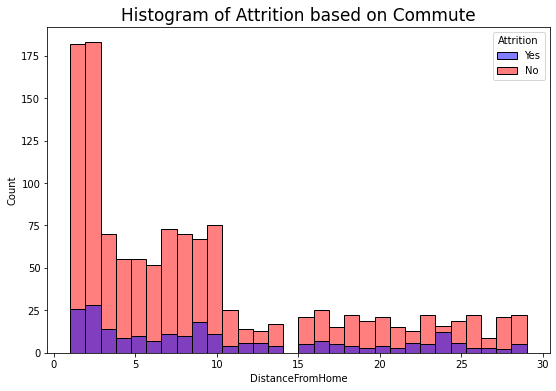

In [21]:
var = "DistanceFromHome"
plt.figure(figsize=(9, 6))
colors=['b', 'r']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.histplot(df, x= var, hue ="Attrition", bins=30, palette=customPalette)
plt.title(f"Histogram of Attrition based on Commute", size=17)
plt.show()

We can also see that distance from home to work and monthly rate does not have a significant effect on attrition.


###**2.7. Attrition based on Satisfaction and Job Involvement**

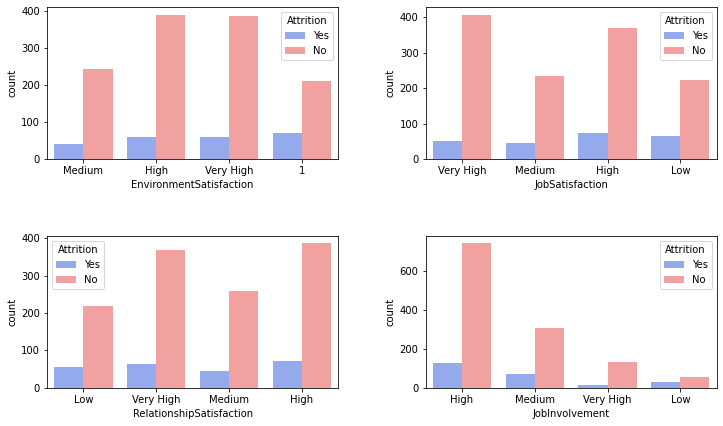

In [22]:
plt.rcParams['figure.figsize']=(12,7)
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(wspace =.3, hspace=.5)
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette=['#87A2FB','#FF9494'], ax = axes[0,0])
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette=['#87A2FB','#FF9494'], ax = axes[0,1])
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette=['#87A2FB','#FF9494'], ax = axes[1,0])
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, palette=['#87A2FB','#FF9494'], ax = axes[1,1]);

The following metrics EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction and JobInvolvement has no big impact in the determination of employees attrition.


###**2.8. Attrition based on Training, Promotion and Years of Service**

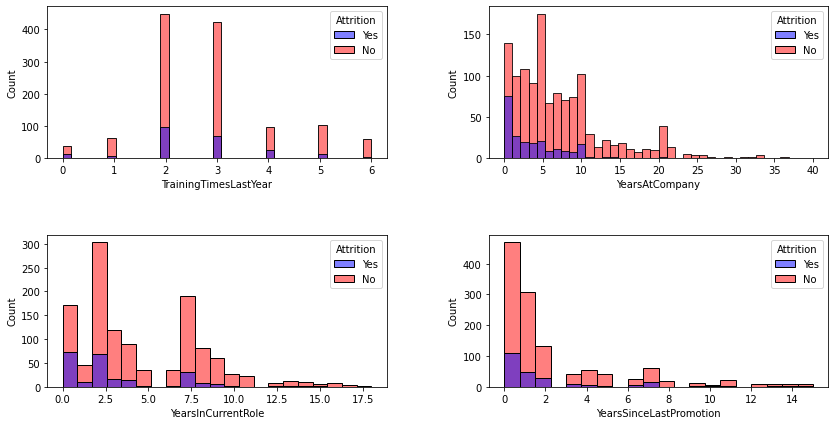

In [23]:
plt.rcParams['figure.figsize']=(14,7)
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(wspace =.3, hspace=.5)
sns.histplot(x='TrainingTimesLastYear', hue='Attrition', data=df, palette=['b', 'r'], ax = axes[0,0])
sns.histplot(x='YearsAtCompany', hue='Attrition', data=df, palette=['b', 'r'], ax = axes[0,1])
sns.histplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette=['b', 'r'], ax = axes[1,0])
sns.histplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, bins=20, palette=['b', 'r'], ax = axes[1,1]);

From the plots above, we can see employees who have been with the company in a short time have higher tendency to quit. On the otherhand, training of staff and Promotion don't have enough impact to retain staff as seen from the plot. 

Lastly, As employees spend more years in a role, the attrition rate reduces.

###**2.9. Attrition based on Monthly Income**

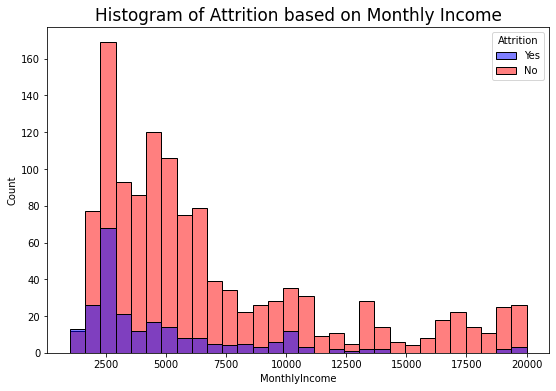

In [24]:
var = "MonthlyIncome"
plt.figure(figsize=(9, 6))
colors=['b', 'r']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.histplot(df, x= var, hue ="Attrition", bins=30, palette=customPalette)
plt.title(f"Histogram of Attrition based on Monthly Income", size=17)
plt.show()

###**2.10. Attrition based on % Salary Hike**

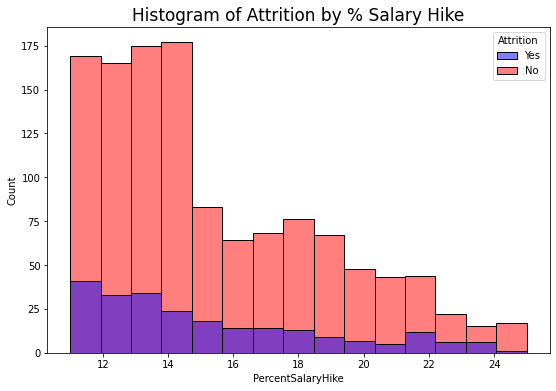

In [25]:
var = "PercentSalaryHike"
plt.figure(figsize=(9, 6))
colors=['b', 'r']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.histplot(df, x= var, hue ="Attrition", bins=15, palette=customPalette)
plt.title(f"Histogram of Attrition by % Salary Hike", size=17)
plt.show()

Income and percent salary hike have a direct impact on employees attrition.

###**2.11. Attrition based on Total working years**

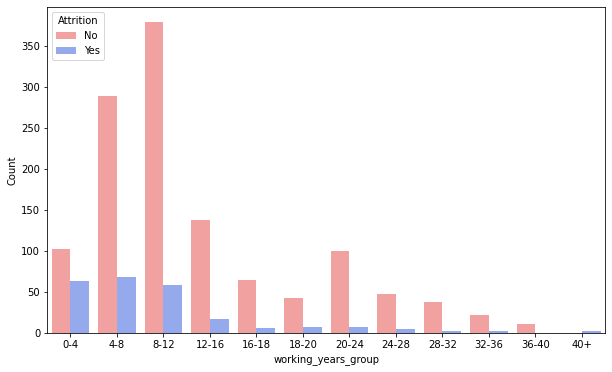

In [26]:

dy= df[["id","TotalWorkingYears", "Attrition"]]
working_years = [0, 4, 8, 12, 16, 18, 20, 24, 28, 32, 36, 40]
dy["working_years_group"] = dy.apply(lambda x: binning(x["TotalWorkingYears"], working_years), axis=1)
at=dy.groupby(['working_years_group','Attrition'],as_index=False)['id'].count()
at['Count']=at['id']
at.drop('id',axis=1,inplace=True)
ds=at.loc[[0,1,17,18,20,21,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19]]
dss=ds.reset_index()
dss.drop('index',axis=1,inplace=True)
plt.figure(figsize=(10, 6))
colors=['#FF9494','#87A2FB']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.barplot(x='working_years_group', y='Count', hue='Attrition',data=dss, palette=customPalette);

Employees with less total working years are more likely to quit.

###**2.12. Attrition based on Job level**

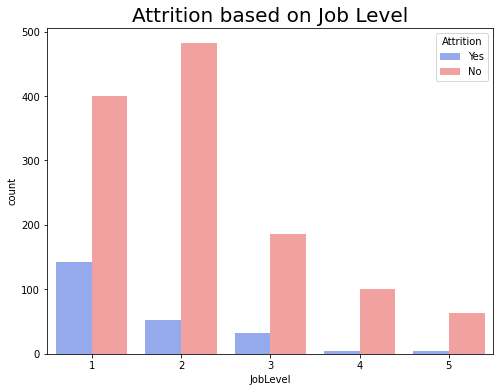

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette=['#87A2FB','#FF9494']).set_title('Attrition based on Job Level', fontdict={'fontsize': 20});

###**2.13. Attrition based on Age**

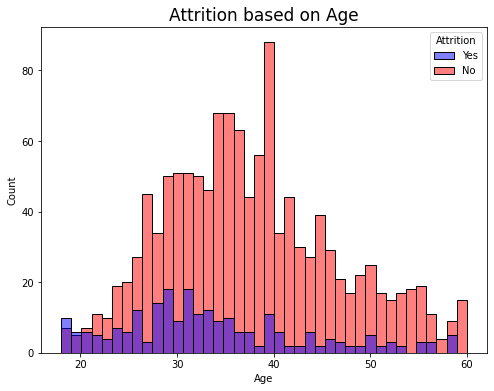

In [28]:
var = "Age"
plt.figure(figsize=(8, 6))
colors=['b', 'r']
customPalette= sns.set_palette(sns.color_palette(colors))
sns.histplot(df, x= var, hue ="Attrition", bins=40, palette=customPalette)
plt.title(f"Attrition based on Age", size=17)
plt.show()

 From the attrition based on age plot above, we can see that younger employees are more likely to quit. The attrition level is higher with younger employees.

There is also a decrease in attrition as employee's age increases.

###**2.14. Heat Map of the dataset**

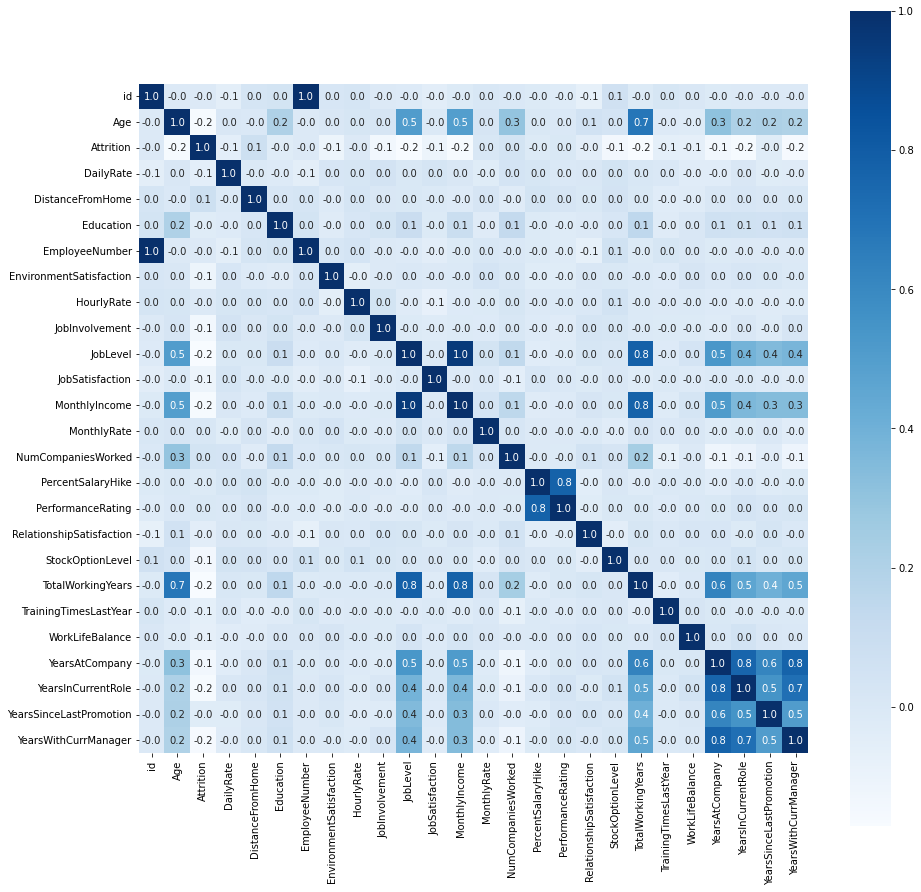

In [ ]:
df['Attrition']=df['Attrition'].replace('No', 0)
df['Attrition']=df['Attrition'].replace('Yes',1)
df=df.drop(['EmployeeCount','StandardHours'], axis =1)
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues');

###**2.15. Barplot on education and Monthly Income**

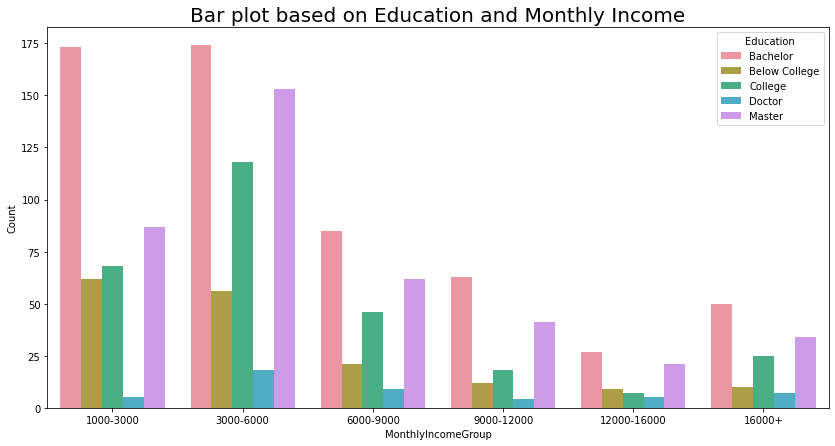

In [29]:
dr=df[["id","MonthlyIncome", "Education"]]
list_monthly_income = [1000, 3000, 6000, 9000, 12000, 16000]
dr["MonthlyIncomeGroup"] = dr.apply(lambda x: binning(x["MonthlyIncome"], list_monthly_income), axis=1)
ap=dr.groupby(['MonthlyIncomeGroup','Education'],as_index=False)['id'].count()
ap['Count']=ap['id']
ap.drop('id',axis=1,inplace=True)
ds=ap.loc[[0,1,2,3,4,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,5,6,7,8,9,10,11,12,13,14]]
dss=ds.reset_index()
dss.drop('index',axis=1,inplace=True)
sns.barplot(x='MonthlyIncomeGroup', y='Count', hue='Education',data=dss).set_title('Bar plot based on Education and Monthly Income', fontdict={'fontsize': 20});

###**2.16. Scatterplot of Age against Monthly Income**

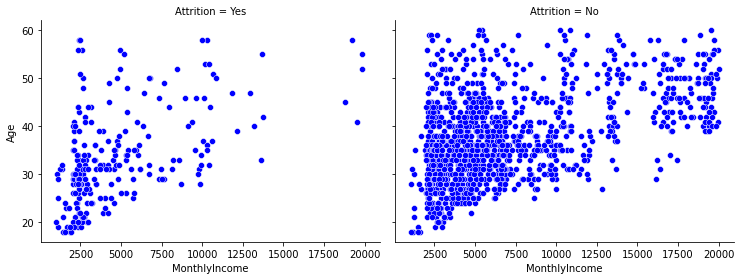

In [30]:
g = sns.FacetGrid(df, col="Attrition",  height=4.0, aspect=1.3)
g.map_dataframe(sns.scatterplot, x="MonthlyIncome",y="Age");

###**3. CONCLUSION**

* The 3 major factors behind employee attrition are MonthlyIncome, JobLevel and Age. These 3 main factors have relationships with other attrition factors such as PercentSalaryHike,YearsInCurrentRole, YearsAtCompany and TotalWorkingYears. 
For example, we can see YearsInCurrentRole,YearsAtCompany, and TotalWorkingYears contribute to employee's attrition but they are intrinsically connected to Age, The attrition rate is higher with younger employees and it is interpreted with these other factors.


* From the [heat map](#scrollTo=RLlVHzTzYaWd&line=1&uniqifier=1), we can see that the relationship between Monthly Income and Education is weakly positive correlated. However, from the [Monthly income group plot](#scrollTo=RLlVHzTzYaWd&line=1&uniqifier=1), there is a decrease in the number of employees as salary increases.

* In this dataset, we found out that the effect Age is inversely proportional to Attrition.
We also see from the [Attrition by Age Plot](#scrollTo=p4j8kfmISUzL&line=2&uniqifier=1) that most young employees have higher tendencies to quit, their age bracket falls within the 18 - 40 years old.

* Judging from the [scatterplot](#scrollTo=RLlVHzTzYaWd&line=1&uniqifier=1), It is seen that Income is the main factor of employee attrition. As no employee within the age of 18 - 24 years is paid above 7,500.

In [31]:
dw=df[df['Age'].between(18,24) & (df['MonthlyIncome'] >= 7500)]
dw.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


* From the heat map, we see that the metric Work life balance is weakly negative correlated to Attrition.

###**4. REFERENCES**

* https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

* https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

* https://rstudio-pubs-static.s3.amazonaws.com/352988_27c464d9cef84d7f9c8b687870e94f83.html

* https://www.kaggle.com/code/harits/ibm-exploring-attrition-of-employee-data

* https://colab.research.google.com/drive/1RbdOmrSFaZpURnz3A7_CYY8BZoJty-2k?usp=sharing&pli=1#scrollTo=q2-95GVw3Q3z

* https://www.youtube.com/watch?v=YYeqJllXHxM

* https://www.youtube.com/watch?app=desktop&v=-esRf38TqkI

* https://stackoverflow.com/questions/57407829/how-to-change-grid-size-using-facet-grid-in-seabron

* https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

* https://www.ionos.com/digitalguide/websites/web-development/markdown/

* https://towardsdatascience.com/practical-guide-to-data-visualization-83e375b0037

* https://towardsdatascience.com/using-logical-comparisons-with-pandas-dataframes-3520eb73ae63